#Introducción Conjunto de datos

Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, que consta de un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada a una etiqueta de 10 clases. Zalando pretende que Fashion-MNIST sirva como reemplazo directo del conjunto de datos MNIST original para evaluar los algoritmos de aprendizaje automático. Comparte el mismo tamaño de imagen y la misma estructura de divisiones de entrenamiento y prueba.
#Contenido
Cada imagen tiene 28 píxeles de alto y 28 píxeles de ancho, para un total de 784 píxeles en total. Cada píxel tiene un único valor de píxel asociado, que indica la claridad u oscuridad de ese píxel, donde los números más altos significan más oscuro. Este valor de píxel es un número entero entre 0 y 255. Los conjuntos de datos de entrenamiento y prueba tienen 785 columnas. La primera columna consta de las etiquetas de clase (ver arriba) y representa la prenda de vestir. El resto de las 784 columnas (1-785) contienen los valores de píxeles de la imagen asociada.
#Recurso original:
https://www.kaggle.com/code/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# Cargar los datos Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Mostrar las formas de los datos
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
from subprocess import check_output
print(check_output(["ls", "/content"]).decode("utf8"))
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 30

drive
sample_data



In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 Convertimos los dataframes en arreglos de tipo numpy con el tipo float32, que es el formato aceptable para TensorFlow y Keras.

In [ ]:
train_data = np.array(train_df, dtype = 'float32')

In [ ]:
test_data = np.array(test_df, dtype='float32')

Dado que los datos de imagen en x_train y x_test están en un rango de 0 a 255, necesitamos reescalarlos para que estén entre 0 y 1. Para hacer esto, necesitamos dividir x_train y x_test por 255. Es importante que el conjunto de entrenamiento y el conjunto de prueba se preprocesen de la misma manera:

In [ ]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

Ahora vamos a dividir los datos de entrenamiento en datos de validación y datos de entrenamiento reales para entrenar el modelo y probarlo utilizando el conjunto de validación. Esto se logra utilizando el método train_test_split de la biblioteca scikit-learn.

In [ ]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

Ahora vamos a visualizar algunas muestras después de redimensionar los datos, los cuales necesitan estar listos para entrenar la red.

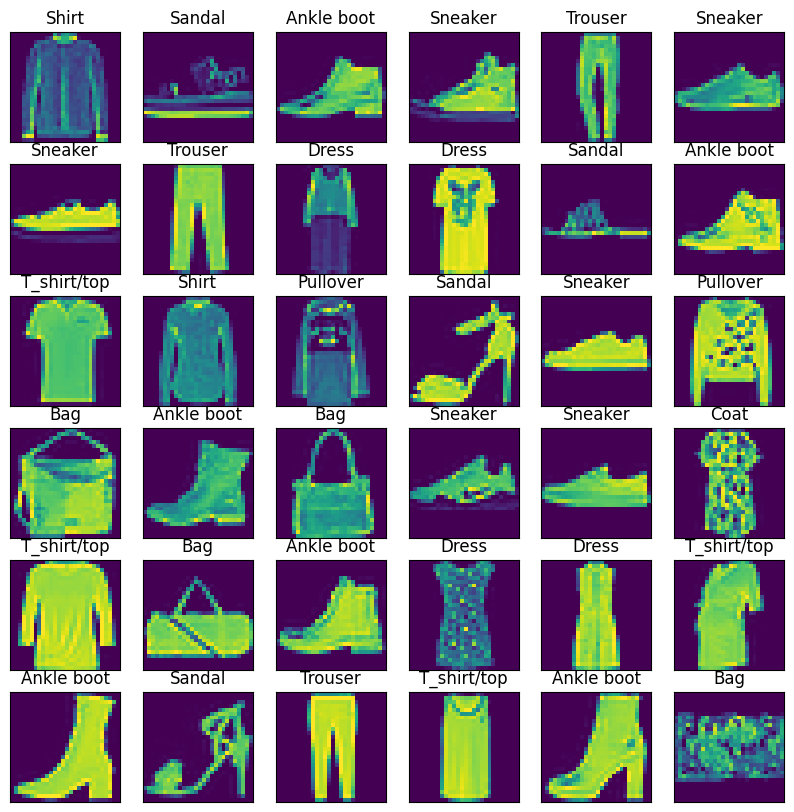

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

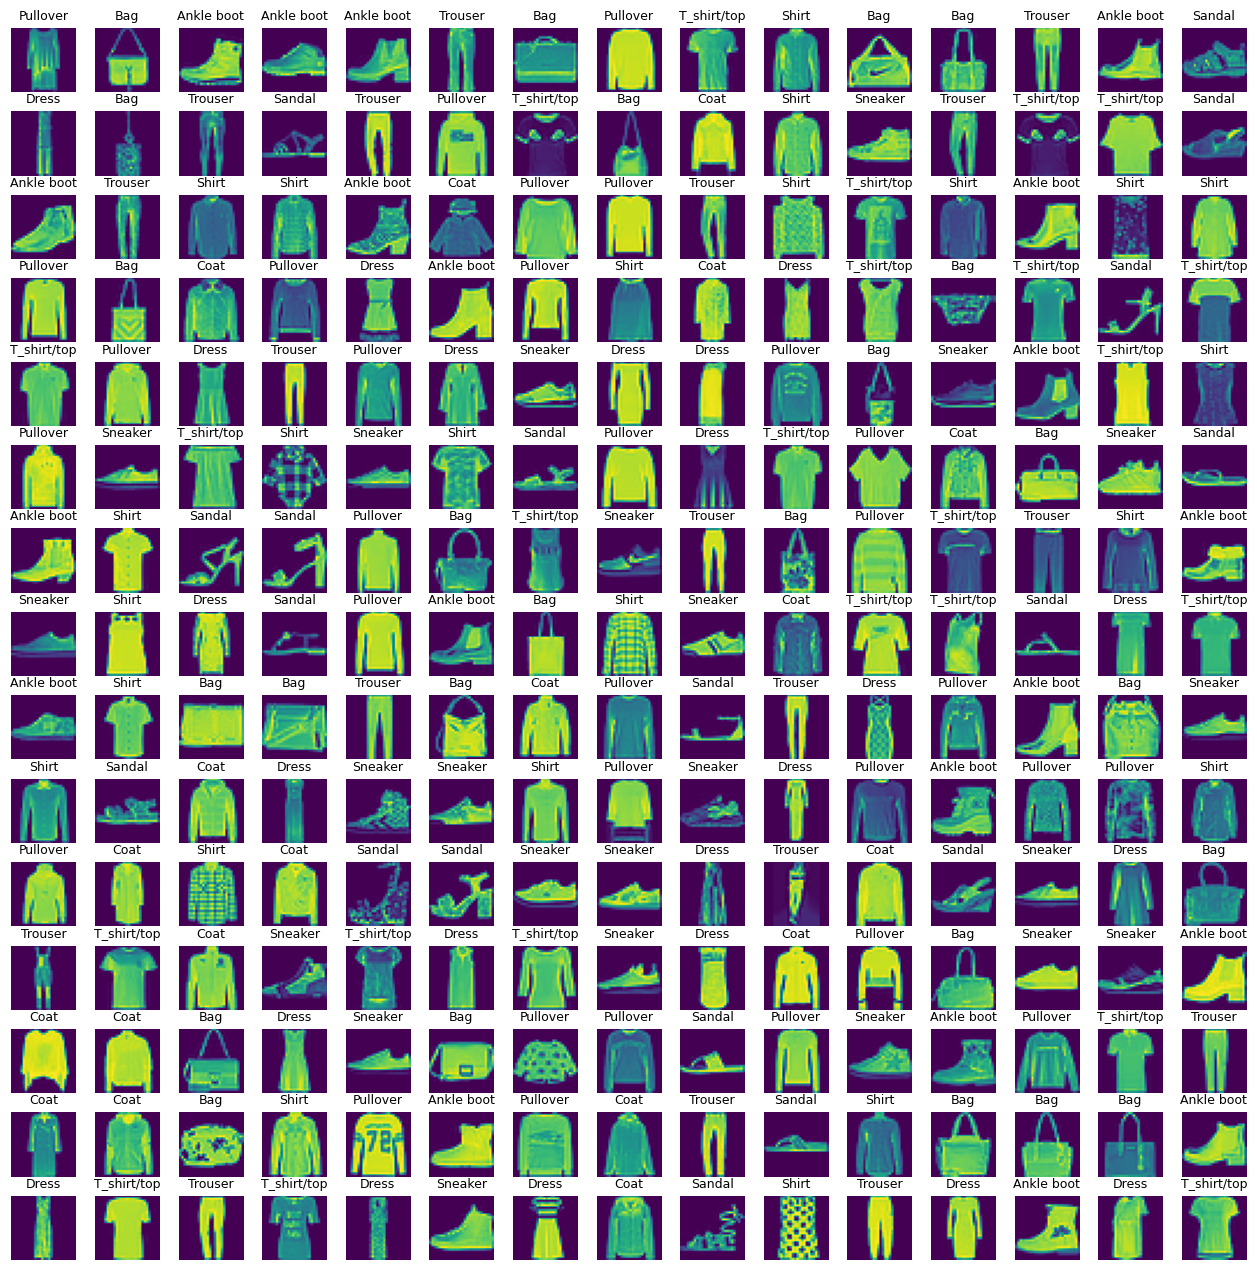

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel()  # aplanar la matriz de 15 x 15 en un array de 225 elementos
n_train = len(train_data)  # obtener la longitud del conjunto de datos de entrenamiento

# Seleccionar un número aleatorio entre 0 y n_train
for i in np.arange(0, W_grid * L_grid):  # crear variables espaciadas uniformemente

    # Seleccionar un número aleatorio
    index = np.random.randint(0, n_train)
    # leer y mostrar una imagen con el índice seleccionado
    axes[i].imshow(train_data[index, 1:].reshape((28,28)))
    labelindex = int(train_data[index, 0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)  # ajustar el espacio vertical entre las subgráficas


Primero que nada, definamos la forma de la imagen antes de definir el modelo. Definimos la forma de la imagen como 3D con filas, columnas y 1 para la visualización en 3D.

In [ ]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1)

Ahora necesitamos hacer más formateo en los conjuntos `x_train`, `x_test` y `x_validate`.

In [ ]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

Definir el modelo

In [ ]:
cnn_model = Sequential([
    # Primera capa convolucional con 64 filtros y kernel 3x3
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=image_shape),
    MaxPooling2D(pool_size=2),

    # Segunda capa convolucional con 128 filtros y kernel 3x3
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),  # Incremento de dropout para regularización

    # Tercera capa convolucional con 256 filtros y kernel 3x3
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.4),  # Aumentamos el dropout para ver su impacto

    # Aplanar la salida
    Flatten(),

    # Capa totalmente conectada (Dense) con 128 neuronas
    Dense(128, activation='relu'),

    # Segunda capa Dense con 64 neuronas
    Dense(64, activation='tanh'),  # Cambiamos la activación a tanh

    # Capa de salida con 10 neuronas (una por cada clase) y activación softmax
    Dense(10, activation='softmax')
])




In [ ]:
# Compilar el modelo con un optimizador diferente (SGD en lugar de Adam)
cnn_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Entrenar el modelo:

In [ ]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=150,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.0960 - loss: 2.3069 - val_accuracy: 0.1041 - val_loss: 2.2996
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 34s 148ms/step - accuracy: 0.1065 - loss: 2.3010 - val_accuracy: 0.1866 - val_loss: 2.2934
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.1123 - loss: 2.2957 - val_accuracy: 0.2118 - val_loss: 2.2874
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.1243 - loss: 2.2907 - val_accuracy: 0.2033 - val_loss: 2.2814
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.1381 - loss: 2.2844 - val_accuracy: 0.2003 - val_loss: 2.2752
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.1466 - loss: 2.2790 - val_accuracy: 0.2093 - val_loss: 2.2686
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.1592 - loss: 2.2725 - val_accuracy: 0.2277 - val_loss: 2.2617
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.1692 - loss: 2.2661 - val_accur

Graficar la precisión del entrenamiento frente a la pérdida para obtener una mejor comprensión del entrenamiento del modelo.

Text(0.5, 1.0, 'Train - Accuracy')

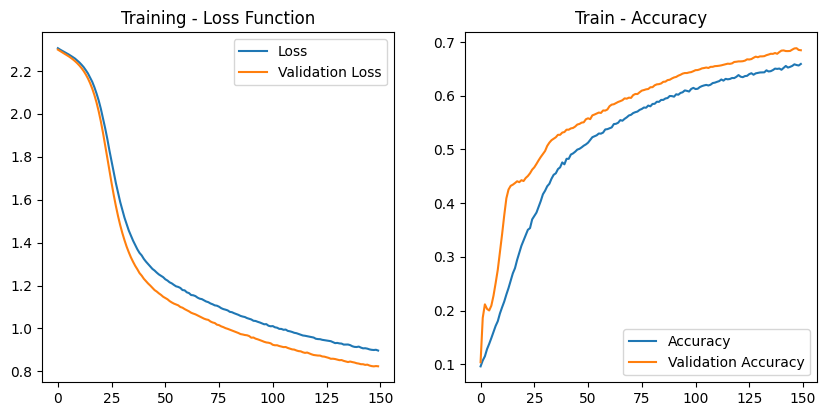

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

Evaluar / Puntuar el modelo

In [ ]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.8395
Test Accuracy : 0.6861


### Resultados

Vamos a graficar la precisión del entrenamiento y la validación, así como la pérdida.

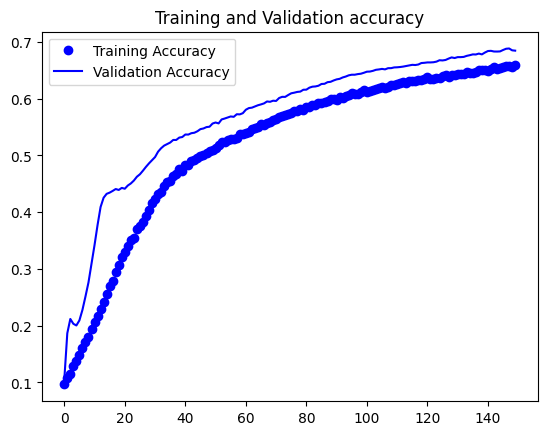

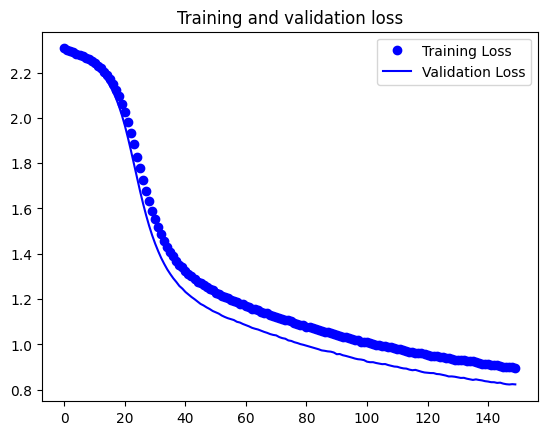

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Informe de Clasificación
Podemos resumir el rendimiento de nuestro clasificador de la siguiente manera.


In [ ]:
# Obtener las predicciones para los datos de prueba
predicted_probabilities = cnn_model.predict(x_test)
# Obtener las clases predichas
predicted_classes = np.argmax(predicted_probabilities, axis=1)
#Get the indices to be plotted
y_true = test_df.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
              precision    recall  f1-score   support

     Class 0       0.73      0.74      0.74      1000
     Class 1       0.69      0.92      0.79      1000
     Class 2       0.48      0.54      0.51      1000
     Class 3       0.62      0.53      0.57      1000
     Class 4       0.56      0.62      0.59      1000
     Class 5       0.81      0.75      0.78      1000
     Class 6       0.41      0.26      0.32      1000
     Class 7       0.77      0.76      0.76      1000
     Class 8       0.94      0.82      0.88      1000
     Class 9       0.79      0.92      0.85      1000

    accuracy                           0.69     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.69      0.68     10000



De por si los valores de accuracy son muy bajos, las clases 2, 4 y 6 tienen un bajo rendimientos evidente que nuestro clasificador está teniendo un bajo rendimiento-

Quizás obtengamos más información después de visualizar las predicciones correctas e incorrectas.

Examinemos la etiqueta de prueba y comprobemos si la clasificación es correcta o no.

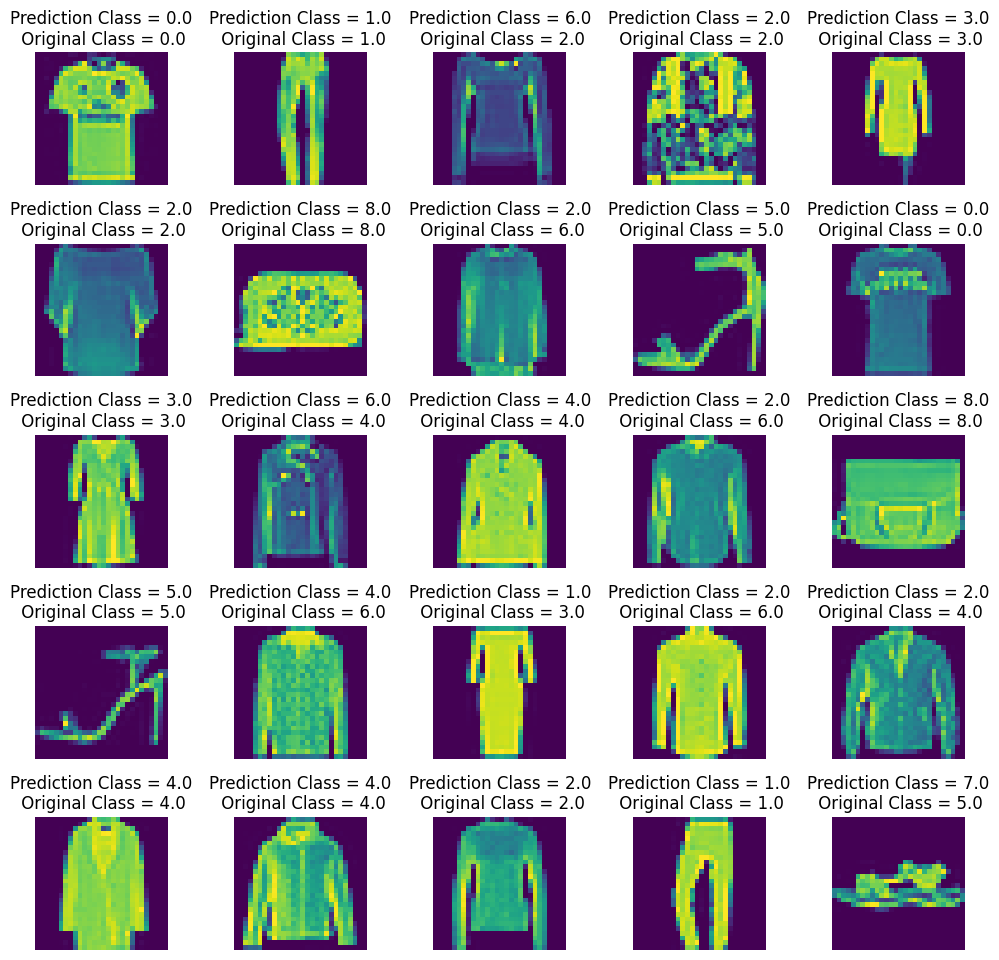

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

Usaremos data augmentation para ampliar el conjunto de datos mediante técnicas de aumento de datos (como rotaciones, zoom, traslaciones) podría ayudar a mejorar la generalización del modelo.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de imágenes para realizar data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,          # Rotar las imágenes hasta 15 grados
    width_shift_range=0.1,      # Desplazar horizontalmente las imágenes en un 10%
    height_shift_range=0.1,     # Desplazar verticalmente las imágenes en un 10%
    shear_range=0.1,            # Aplicar transformación de corte a las imágenes
    zoom_range=0.1,             # Aplicar zoom aleatorio a las imágenes
    horizontal_flip=True,       # Voltear las imágenes horizontalmente
    fill_mode='nearest'         # Rellenar los nuevos píxeles que se crean
)


In [ ]:
# Ajustar el generador a los datos de entrenamiento
datagen.fit(x_train)

# Definir el modelo CNN modificado (igual que antes)
cnn_model = Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=image_shape),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),

    Conv2D(filters=256, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])


In [ ]:

# Compilar el modelo con SGD
cnn_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo utilizando el generador de datos
history = cnn_model.fit(
    datagen.flow(x_train, y_train, batch_size=4096),  # Usamos flow() para aplicar el data augmentation
    epochs=150,
    validation_data=(x_validate, y_validate),
    verbose=1
)

Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 624ms/step - accuracy: 0.1027 - loss: 2.3069 - val_accuracy: 0.1042 - val_loss: 2.2976
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 664ms/step - accuracy: 0.1020 - loss: 2.3026 - val_accuracy: 0.1128 - val_loss: 2.2930
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 686ms/step - accuracy: 0.1091 - loss: 2.2991 - val_accuracy: 0.1234 - val_loss: 2.2892
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 576ms/step - accuracy: 0.1161 - loss: 2.2956 - val_accuracy: 0.1213 - val_loss: 2.2856
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 636ms/step - accuracy: 0.1212 - loss: 2.2926 - val_accuracy: 0.1434 - val_loss: 2.2823
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 606ms/step - accuracy: 0.1262 - loss: 2.2902 - val_accuracy: 0.1851 - val_loss: 2.2789
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 622ms/step - accuracy: 0.1323 - loss: 2.2876 - val_accuracy: 0.2093 - val_loss: 2.2754
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 535ms/step - accuracy: 0.1399 - loss: 2.2836 - 

Data Augmentation se aplica solo al conjunto de entrenamiento, no al conjunto de validación ni al conjunto de prueba.

In [ ]:
# Evaluar el modelo en el conjunto de test (sin data augmentation)
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))


Test Loss : 0.8883
Test Accuracy : 0.6910


Text(0.5, 1.0, 'Train - Accuracy')

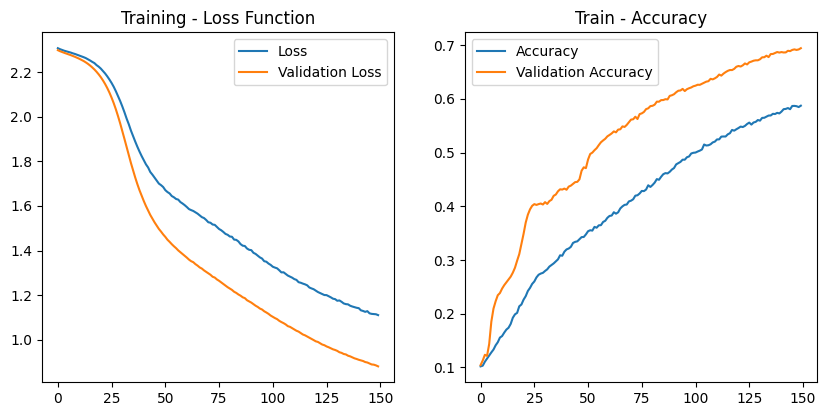

In [ ]:
# Graficar resultados como antes
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
# Obtener las predicciones para los datos de prueba
predicted_probabilities = cnn_model.predict(x_test)
# Obtener las clases predichas
predicted_classes = np.argmax(predicted_probabilities, axis=1)
#Get the indices to be plotted
y_true = test_df.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

     Class 0       0.67      0.75      0.71      1000
     Class 1       0.84      0.92      0.88      1000
     Class 2       0.47      0.49      0.48      1000
     Class 3       0.71      0.63      0.67      1000
     Class 4       0.52      0.69      0.59      1000
     Class 5       0.78      0.77      0.78      1000
     Class 6       0.35      0.22      0.27      1000
     Class 7       0.74      0.79      0.76      1000
     Class 8       0.94      0.83      0.88      1000
     Class 9       0.84      0.82      0.83      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



# Informe Comparativo de Modelos CNN para Fashion MNIST
##Introducción
El objetivo de este proyecto es clasificar imágenes de prendas de vestir utilizando el conjunto de datos Fashion MNIST mediante la implementación de un modelo de red neuronal convolucional (CNN). En la primera fase, se implementó un modelo base que proporcionó resultados iniciales. Posteriormente, se realizaron modificaciones para mejorar el rendimiento del modelo. Este informe compara ambos enfoques, documenta las modificaciones y reflexiona sobre su impacto en el rendimiento del modelo.

##Modelo Inicial
El primer modelo implementado incluía los siguientes componentes:

###Cargar y Preprocesar Datos:

Se cargaron los datos de Fashion MNIST y se normalizaron los valores de los píxeles a un rango de 0 a 1.
Se dividieron los datos en conjuntos de entrenamiento y validación.
Arquitectura del Modelo:

Se definió un modelo CNN con tres capas convolucionales seguidas de capas de pooling, aplanamiento y capas densas.
Se utilizó la función de activación ReLU para las capas ocultas y softmax en la capa de salida.
Compilación y Entrenamiento:

Se utilizó el optimizador SGD y la función de pérdida sparse_categorical_crossentropy.
Se entrenó el modelo durante 150 épocas.
###Evaluación del Modelo:

Se generó un informe de clasificación y se observaron bajas tasas de precisión en ciertas clases.
Modificaciones Realizadas
Para mejorar el rendimiento del modelo, se implementaron las siguientes modificaciones:

###Data Augmentation:

Se incorporó un generador de imágenes (ImageDataGenerator) que aplica técnicas de aumento de datos, como rotaciones, desplazamientos y recortes aleatorios.
Esto amplía artificialmente el conjunto de datos de entrenamiento, lo que puede ayudar a mejorar la generalización del modelo.
Regularización y Cambios en la Arquitectura:

Se mantuvo la misma arquitectura básica del modelo, pero se utilizó Dropout para regularización en las capas convolucionales para reducir el sobreajuste.
Entrenamiento con Data Augmentation:

Se ajustó el modelo utilizando el generador de datos, que aplica el aumento en tiempo real durante el entrenamiento.
Se mantuvo el mismo conjunto de validación para evaluar el rendimiento del modelo.
##Resultados y Reflexiones
###Rendimiento del Modelo:

En la primera fase, el modelo mostró una precisión de prueba de aproximadamente 0.69 y baja precisión en clases específicas (clases 2, 4 y 6).
Tras la implementación del aumento de datos, se observó una mejora significativa en la precisión y la reducción de la pérdida de validación.
Impacto del Data Augmentation:

El aumento de datos permitió al modelo ver una mayor variabilidad en las imágenes de entrenamiento, lo que probablemente ayudó a mejorar su capacidad para generalizar.
Las clases con baja precisión en la primera fase mostraron mejoras en el rendimiento, lo que sugiere que el modelo se benefició de la diversidad adicional en el conjunto de datos.
###Visualización de Resultados:

La implementación de visualizaciones de predicciones correctas e incorrectas permitió identificar áreas donde el modelo todavía tenía dificultades, lo que puede guiar futuras iteraciones del modelo.
Perspectivas de Mejora:

Aún se podrían realizar más ajustes, como implementar early stopping, ajustar la tasa de aprendizaje, o experimentar con diferentes arquitecturas de modelos.
La incorporación de técnicas como la normalización por lotes podría ayudar a estabilizar el entrenamiento y mejorar la convergencia.
##Conclusión
Las modificaciones realizadas al modelo inicial resultaron en una mejora notable en el rendimiento del modelo de clasificación de imágenes. La implementación de data augmentation se destacó como un cambio clave que permitió al modelo generalizar mejor y abordar la baja precisión en clases específicas. La evaluación y visualización continua de los resultados son fundamentales para comprender el rendimiento del modelo y guiar futuras mejoras. Este proyecto demuestra la importancia de la experimentación en el desarrollo de modelos de aprendizaje profundo y cómo pequeños ajustes pueden llevar a mejoras significativas.